In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt


In [39]:
df = pd.read_csv("Data/cleaned_data.csv")

In [40]:
df

,INCOME,SAVINGS,DEBT,R_SAVINGS_INCOME,R_DEBT_INCOME,R_DEBT_SAVINGS,T_CLOTHING_12,T_CLOTHING_6,R_CLOTHING,R_CLOTHING_INCOME,...,R_EXPENDITURE_INCOME,R_EXPENDITURE_SAVINGS,R_EXPENDITURE_DEBT,CAT_GAMBLING,CAT_DEBT,CAT_CREDIT_CARD,CAT_MORTGAGE,CAT_SAVINGS_ACCOUNT,CAT_DEPENDENTS,CREDIT_SCORE
0,33269,0,532304,0.0000,16.0000,1.2000,1889,945,0.5003,0.0568,...,1.0000,0.0000,0.0625,2,1,0,0,0,0,444
1,77158,91187,315648,1.1818,4.0909,3.4615,5818,111,0.0191,0.0754,...,0.9091,0.7692,0.2222,0,1,0,0,1,0,625
2,30917,21642,534864,0.7000,17.3000,24.7142,1157,860,0.7433,0.0374,...,1.0000,1.4286,0.0578,2,1,0,0,1,0,469
3,80657,64526,629125,0.8000,7.8000,9.7499,6857,3686,0.5376,0.0850,...,1.0000,1.2500,0.1282,2,1,0,0,1,0,559
4,149971,1172498,2399531,7.8182,16.0000,2.0465,1978,322,0.1628,0.0132,...,0.9091,0.1163,0.0568,2,1,1,1,1,1,473
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,328892,1465066,5501471,4.4546,16.7273,3.7551,16701,10132,0.6067,0.0508,...,0.9091,0.2041,0.0543,2,1,1,1,1,1,418
996,81404,88805,680837,1.0909,8.3637,7.6667,5400,1936,0.3585,0.0663,...,0.9091,0.8333,0.1087,0,1,0,0,1,0,589
997,0,42428,30760,3.2379,8.1889,0.7250,0,0,0.8779,0.0047,...,1.0668,0.2500,0.3448,0,1,0,0,1,0,499
998,36011,8002,604181,0.2222,16.7777,75.5037,1993,1271,0.6377,0.0553,...,1.1111,5.0002,0.0662,0,1,1,0,1,0,507


In [41]:
df.loc[[1,2,3,4,5],:]

,INCOME,SAVINGS,DEBT,R_SAVINGS_INCOME,R_DEBT_INCOME,R_DEBT_SAVINGS,T_CLOTHING_12,T_CLOTHING_6,R_CLOTHING,R_CLOTHING_INCOME,...,R_EXPENDITURE_INCOME,R_EXPENDITURE_SAVINGS,R_EXPENDITURE_DEBT,CAT_GAMBLING,CAT_DEBT,CAT_CREDIT_CARD,CAT_MORTGAGE,CAT_SAVINGS_ACCOUNT,CAT_DEPENDENTS,CREDIT_SCORE
1,77158,91187,315648,1.1818,4.0909,3.4615,5818,111,0.0191,0.0754,...,0.9091,0.7692,0.2222,0,1,0,0,1,0,625
2,30917,21642,534864,0.7000,17.3000,24.7142,1157,860,0.7433,0.0374,...,1.0000,1.4286,0.0578,2,1,0,0,1,0,469
3,80657,64526,629125,0.8000,7.8000,9.7499,6857,3686,0.5376,0.0850,...,1.0000,1.2500,0.1282,2,1,0,0,1,0,559
4,149971,1172498,2399531,7.8182,16.0000,2.0465,1978,322,0.1628,0.0132,...,0.9091,0.1163,0.0568,2,1,1,1,1,1,473
5,181636,339055,1695274,1.8667,9.3334,5.0000,11446,1910,0.1669,0.0630,...,0.6667,0.3571,0.0714,0,1,0,0,1,0,596


## Scaling

In [42]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [43]:
scaled_df = scaler.fit_transform(df)

In [44]:
df = pd.DataFrame(scaled_df, columns=df.columns)

In [13]:
df

,INCOME,SAVINGS,DEBT,R_SAVINGS_INCOME,R_DEBT_INCOME,R_DEBT_SAVINGS,T_CLOTHING_12,T_CLOTHING_6,R_CLOTHING,R_CLOTHING_INCOME,...,R_EXPENDITURE_INCOME,R_EXPENDITURE_SAVINGS,R_EXPENDITURE_DEBT,CAT_GAMBLING,CAT_DEBT,CAT_CREDIT_CARD,CAT_MORTGAGE,CAT_SAVINGS_ACCOUNT,CAT_DEPENDENTS,CREDIT_SCORE
0,0.050248,0.000000,0.089184,0.000000,0.432425,0.004098,0.043671,0.023674,0.472739,0.215062,...,0.249944,0.000000,0.006247,1.0,1.0,0.0,0.0,0.0,0.0,0.288
1,0.116536,0.031316,0.052885,0.073353,0.110563,0.011820,0.134505,0.002781,0.018048,0.289972,...,0.181777,0.076844,0.022208,0.0,1.0,0.0,0.0,1.0,0.0,0.650
2,0.046696,0.007432,0.089613,0.043448,0.467560,0.084394,0.026748,0.021544,0.702353,0.136931,...,0.249944,0.142719,0.005777,1.0,1.0,0.0,0.0,1.0,0.0,0.338
3,0.121821,0.022160,0.105405,0.049655,0.210807,0.033294,0.158525,0.092339,0.507985,0.328635,...,0.249944,0.124876,0.012813,1.0,1.0,0.0,0.0,1.0,0.0,0.518
4,0.226510,0.402662,0.402024,0.485265,0.432425,0.006988,0.045729,0.008067,0.153832,0.039468,...,0.181777,0.011618,0.005677,1.0,1.0,1.0,1.0,1.0,1.0,0.346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.496745,0.503137,0.921732,0.276491,0.452082,0.012823,0.386106,0.253820,0.573278,0.190898,...,0.181777,0.020390,0.005427,1.0,1.0,1.0,1.0,1.0,1.0,0.236
996,0.122949,0.030498,0.114069,0.067711,0.226042,0.026180,0.124841,0.048499,0.338751,0.253323,...,0.181777,0.083248,0.010864,0.0,1.0,0.0,0.0,1.0,0.0,0.578
997,0.000000,0.014571,0.005154,0.200972,0.221318,0.002476,0.000000,0.000000,0.829538,0.005236,...,0.300037,0.024975,0.034462,0.0,1.0,0.0,0.0,1.0,0.0,0.398
998,0.054390,0.002748,0.101226,0.013792,0.453444,0.257831,0.046076,0.031840,0.602570,0.209021,...,0.333258,0.499525,0.006616,0.0,1.0,1.0,0.0,1.0,0.0,0.414


In [45]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X.shape, y.shape

((1000, 84), (1000,))

In [15]:
# random choice
indexes = [i for i in range(1000)]
indexes

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [24]:
chosen_idx = np.random.choice(df.shape[0], replace=False, size=600)
data_chosen = X.iloc[chosen_idx].reset_index(drop=True)
label_chosen = y.iloc[chosen_idx].reset_index(drop=True)

array([709, 509, 440, 851, 400, 547, 791, 437, 235, 489, 546, 559, 381,
       476, 116, 757, 982, 126,  79, 321])

In [20]:
from mrmr import mrmr_classif
import pandas as pd
import numpy as np
from typing import Dict
class MRMR:
    def __init__(self, k=None, s=3):
        """
        :param k: number of features to select
        :param s: number of iterations
        """
        self.k = k
        self.s = s
    def feature_importance(self, data: pd.DataFrame, labels: pd.DataFrame) -> Dict[str, float]:
        """
        :param data: pd.DataFrame, shape (n_samples, n_features)
        :param labels: pd.DataFrame, shape (n_samples, n_labels)
        :return: dict, feature importance
        """
        if self.k is None:
            self.k = len(data.columns)
        rate_dict = {}
        label_bg_id = labels['BG_id']
        for i in range(self.s):
            chosen_idx = np.random.choice(len(data), replace=False, size=len(data) // self.s)
            data_chosen = data.iloc[chosen_idx].reset_index(drop=True)
            label_chosen = label_bg_id.iloc[chosen_idx].reset_index(drop=True)
            selected_features = mrmr_classif(X=data_chosen, y=label_chosen, K=self.k, return_scores=True)
            F = selected_features[1]
            corr = selected_features[2]
            selected = []
            not_selected = list(data_chosen.columns)
            for _ in range(self.k):
                score = F.loc[not_selected] / corr.loc[not_selected, selected].mean(axis=1).fillna(.00001)
                best = score.index[score.argmax()]
                if best in rate_dict:
                    rate_dict[best].append(score.max())
                else:
                    rate_dict[best] = [score.max()]
                selected.append(best)
                not_selected.remove(best)
        rate_dict_mean = {key:sum(value) / len(value) for key, value in rate_dict.items()}
        return rate_dict_mean


array([768,   2, 966, 872, 976, 701, 741, 464, 922, 296, 277, 143, 944,
       399, 123, 607, 910,  32, 783, 789])

array([ 97, 844, 581, 600,  28, 825, 473,  24, 870, 448, 377, 687, 110,
       250, 370, 552, 774, 338, 413, 813])

## SelectKBest with f_regression

In [46]:
from sklearn.feature_selection import SelectKBest, chi2, f_regression
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [53]:
# configure to select all features
fs = SelectKBest(score_func=f_regression, k='all')

In [56]:
# learn relationship from training data
num_iterations = 1
for iteration in range(num_iterations):
    chosen_idx = np.random.choice(df.shape[0], replace=False, size=600)
    data_chosen = X.iloc[chosen_idx].reset_index(drop=True)
    label_chosen = y.iloc[chosen_idx].reset_index(drop=True)
    data_fit = fs.fit(data_chosen, label_chosen)
    selected_features = data_fit.transform(data_chosen)
    print(f"Iteration {iteration + 1}: Selected features indices: {fs.get_support(indices=True)}")


Iteration 1: Selected features indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83]


In [ ]:
from sklearn.linear_model import LassoCV

# Fit LassoCV model
lasso_cv = LassoCV(cv=5) 

In [75]:
from sklearn.feature_selection import SelectKBest, f_regression
import numpy as np

# Initialize SelectKBest with k='all'
fs = SelectKBest(score_func=f_regression, k='all')

# Define the number of iterations
num_iterations = 3
scores_dict = dict()
# Iterate over the number of iterations
for iteration in range(num_iterations):
    # Randomly choose 600 rows
    chosen_idx = np.random.choice(X.shape[0], replace=False, size=600)
    
    # Subset data and labels
    data_chosen = X.iloc[chosen_idx].reset_index(drop=True)
    label_chosen = y.iloc[chosen_idx].reset_index(drop=True)
    
    # Perform feature selection
    selected_features = fs.fit_transform(data_chosen, label_chosen)
    
    # Get indices of selected features
    # selected_indices = fs.pvalues_
    
    selected_indices = np.argsort(fs.scores_)[::-1]
    selected_features = X.columns[selected_indices]
    
    if not scores_dict:
        for key, value in zip(selected_features, np.sort(fs.scores_)[::-1]):
            scores_dict[key] = [value]
    else:
        for key, value in zip(selected_features, np.sort(fs.scores_)[::-1]):
            scores_dict[key].append(value)
        
    # Print selected features (indices)
    print(f"Iteration {iteration + 1}: Selected features indices: {list(zip(selected_features, np.sort(fs.scores_)[::-1]))}")

scores_mean_dict  = scores_dict.copy()
for key, value in scores_dict.items():
    scores_mean_dict[key] = np.mean(value)

Iteration 1: Selected features indices: [('R_DEBT_INCOME', 1657.349239753578), ('R_DEBT_SAVINGS', 168.10754533741562), ('R_EXPENDITURE_DEBT', 60.62804189240681), ('R_UTILITIES_DEBT', 58.004419299969726), ('DEBT', 55.08361732538073), ('R_GROCERIES_DEBT', 54.38811474046963), ('R_EDUCATION_INCOME', 50.21620760731575), ('R_ENTERTAINMENT_DEBT', 46.69319634224932), ('R_TAX_DEBT', 46.322274582112385), ('R_HEALTH_DEBT', 45.92765452691666), ('R_SAVINGS_INCOME', 45.47169705232699), ('R_TRAVEL_DEBT', 40.2005775582204), ('R_CLOTHING_DEBT', 32.33008222351834), ('CAT_CREDIT_CARD', 31.93824442419693), ('R_HOUSING_DEBT', 31.884682006939016), ('CAT_GAMBLING', 30.89212139107201), ('R_UTILITIES_SAVINGS', 29.54524933460701), ('R_EDUCATION_SAVINGS', 27.781509478016503), ('CAT_DEBT', 25.052192652251204), ('R_ENTERTAINMENT_INCOME', 19.996899251867212), ('R_HEALTH_INCOME', 19.753843913597034), ('R_GROCERIES_SAVINGS', 18.846054140123407), ('R_GAMBLING_INCOME', 18.273337495905892), ('R_HEALTH_SAVINGS', 14.30009

In [81]:
print(sorted(scores_mean_dict.items(), key=lambda x: x[1], reverse=True))

[('R_DEBT_INCOME', 1748.9250932733867), ('R_DEBT_SAVINGS', 163.87300464544285), ('DEBT', 73.24396776664115), ('R_TAX_DEBT', 65.32997795301821), ('R_EDUCATION_INCOME', 64.77585037484364), ('R_EXPENDITURE_DEBT', 62.261922670720594), ('R_UTILITIES_DEBT', 59.20841945430587), ('R_GROCERIES_DEBT', 53.92064849647509), ('R_ENTERTAINMENT_DEBT', 49.645555321116774), ('R_HEALTH_DEBT', 43.44396015213497), ('R_SAVINGS_INCOME', 41.44414558302528), ('R_TRAVEL_DEBT', 36.358318758096466), ('R_EDUCATION_SAVINGS', 35.804596812023206), ('R_HOUSING_DEBT', 32.85579498771621), ('CAT_CREDIT_CARD', 32.047195627543026), ('R_CLOTHING_DEBT', 31.45224661813853), ('CAT_GAMBLING', 30.829050083681732), ('R_UTILITIES_SAVINGS', 30.811419855849604), ('CAT_DEBT', 28.518739296447563), ('R_ENTERTAINMENT_INCOME', 22.16920682406352), ('R_HEALTH_SAVINGS', 22.123939852462907), ('R_GROCERIES_SAVINGS', 21.720335488886533), ('R_GROCERIES_INCOME', 19.41660172105981), ('R_EXPENDITURE', 17.982285044959134), ('R_GAMBLING_INCOME', 17.

array([4.22510071e-06, 3.78617471e-03, 1.11009408e-02, 2.28494384e-02,
       2.54997216e-02, 1.47634508e-01, 1.71000025e-01, 1.90016401e-01,
       2.33771694e-01, 4.14776351e-01, 5.57936716e-01, 6.76408300e-01,
       8.96218082e-01, 9.27588640e-01, 9.90700511e-01, 1.46486704e+00,
       1.49401087e+00, 1.49463018e+00, 1.50383885e+00, 1.59694540e+00,
       1.61208327e+00, 1.73850705e+00, 1.80254211e+00, 2.19281502e+00,
       2.21309131e+00, 2.29570991e+00, 2.36588842e+00, 2.40847525e+00,
       2.50209669e+00, 2.79240294e+00, 2.79292238e+00, 2.82008422e+00,
       3.13995453e+00, 3.26148356e+00, 3.66527455e+00, 4.02177661e+00,
       4.03651856e+00, 4.04289667e+00, 4.13585417e+00, 4.15924229e+00,
       4.37834105e+00, 5.09572414e+00, 5.28684589e+00, 5.28686302e+00,
       5.79082163e+00, 6.02467047e+00, 6.13713312e+00, 6.43383898e+00,
       8.25010247e+00, 9.76663683e+00, 1.00322421e+01, 1.05156199e+01,
       1.05660839e+01, 1.09640984e+01, 1.24310708e+01, 1.29123233e+01,
      

In [33]:
chosen_idx = np.random.choice(df.shape[0], replace=False, size=600)
data_chosen = X.iloc[chosen_idx].reset_index(drop=True)
label_chosen = y.iloc[chosen_idx].reset_index(drop=True)
selected_features = fs.fit_transform(data_chosen, label_chosen)
selected_features.shape

(600, 84)

In [16]:
feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': fs.scores_})

# Sort feature scores in descending order
sorted_scores = feature_scores.sort_values(by='Score', ascending=False)
sorted_scores

,Feature,Score
4,R_DEBT_INCOME,2020.906222
5,R_DEBT_SAVINGS,194.435074
15,R_EDUCATION_INCOME,99.470380
2,DEBT,84.468037
71,R_UTILITIES_DEBT,75.809618
...,...,...
24,T_FINES_12,0.100769
6,T_CLOTHING_12,0.099875
73,T_EXPENDITURE_6,0.084443
69,R_UTILITIES_INCOME,0.045738


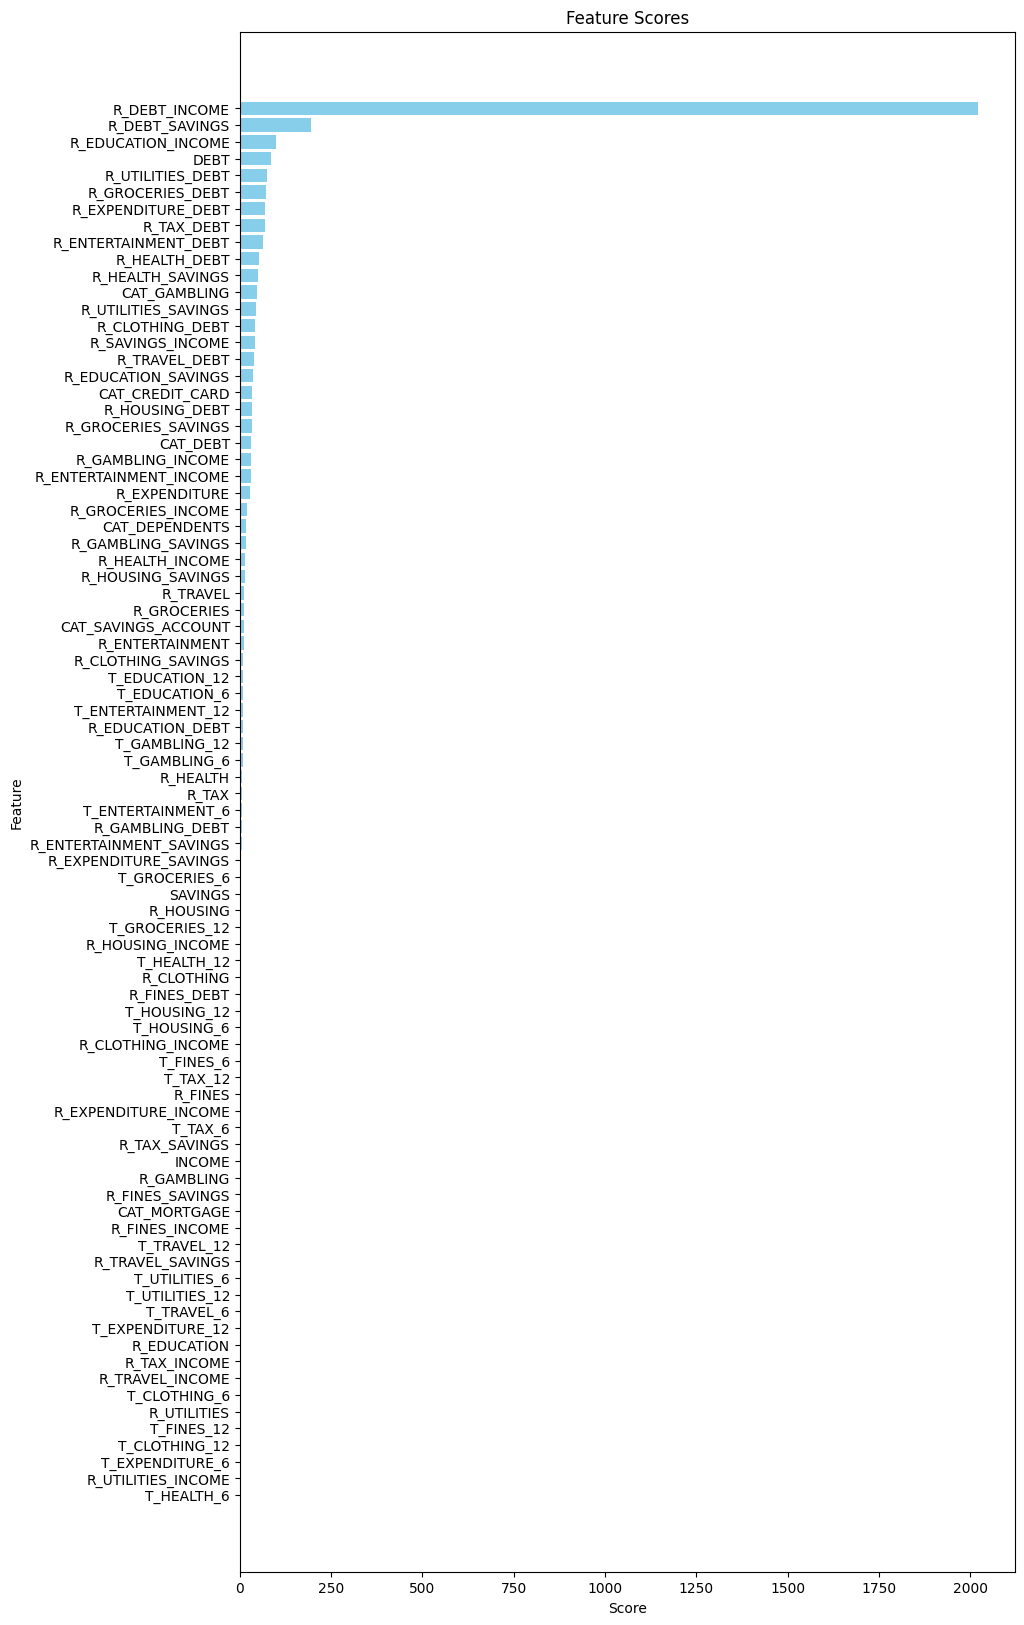

In [17]:
plt.figure(figsize=(10, 20))
plt.barh(sorted_scores['Feature'], sorted_scores['Score'], color='skyblue')
plt.xlabel('Score')
plt.ylabel('Feature')
plt.title('Feature Scores')
plt.gca().invert_yaxis()  # Invert y-axis to show highest score on top
plt.show()

In [18]:
sorted_scores.set_index('Feature', inplace=True)

In [19]:
sorted_scores

,Score
Feature,
R_DEBT_INCOME,2020.906222
R_DEBT_SAVINGS,194.435074
R_EDUCATION_INCOME,99.470380
DEBT,84.468037
R_UTILITIES_DEBT,75.809618
...,...
T_FINES_12,0.100769
T_CLOTHING_12,0.099875
T_EXPENDITURE_6,0.084443


In [20]:
selected_features_f_reg = sorted_scores.loc[:"R_ENTERTAINMENT_SAVINGS"]

In [21]:
selected_features_f_reg

,Score
Feature,
R_DEBT_INCOME,2020.906222
R_DEBT_SAVINGS,194.435074
R_EDUCATION_INCOME,99.470380
DEBT,84.468037
R_UTILITIES_DEBT,75.809618
R_GROCERIES_DEBT,71.658764
R_EXPENDITURE_DEBT,70.361586
R_TAX_DEBT,68.218433
R_ENTERTAINMENT_DEBT,62.614899


In [22]:
len(selected_features_f_reg)

45

## SelectKBest with mutual_info_regression

In [23]:
from sklearn.feature_selection import mutual_info_regression
# configure to select all features
fs = SelectKBest(score_func=mutual_info_regression, k='all')
# learn relationship from training data
fs.fit(X_train, y_train)
# transform train input data
X_train_fs = fs.transform(X_train)
# transform test input data
X_test_fs = fs.transform(X_test)


In [24]:
feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': fs.scores_})

# Sort feature scores in descending order
sorted_scores = feature_scores.sort_values(by='Score', ascending=False)
sorted_scores

,Feature,Score
4,R_DEBT_INCOME,0.604978
77,R_EXPENDITURE_DEBT,0.386431
71,R_UTILITIES_DEBT,0.285865
59,R_TAX_DEBT,0.280519
23,R_ENTERTAINMENT_DEBT,0.277497
...,...,...
14,R_EDUCATION,0.000000
25,T_FINES_6,0.000000
26,R_FINES,0.000000
62,R_TRAVEL,0.000000


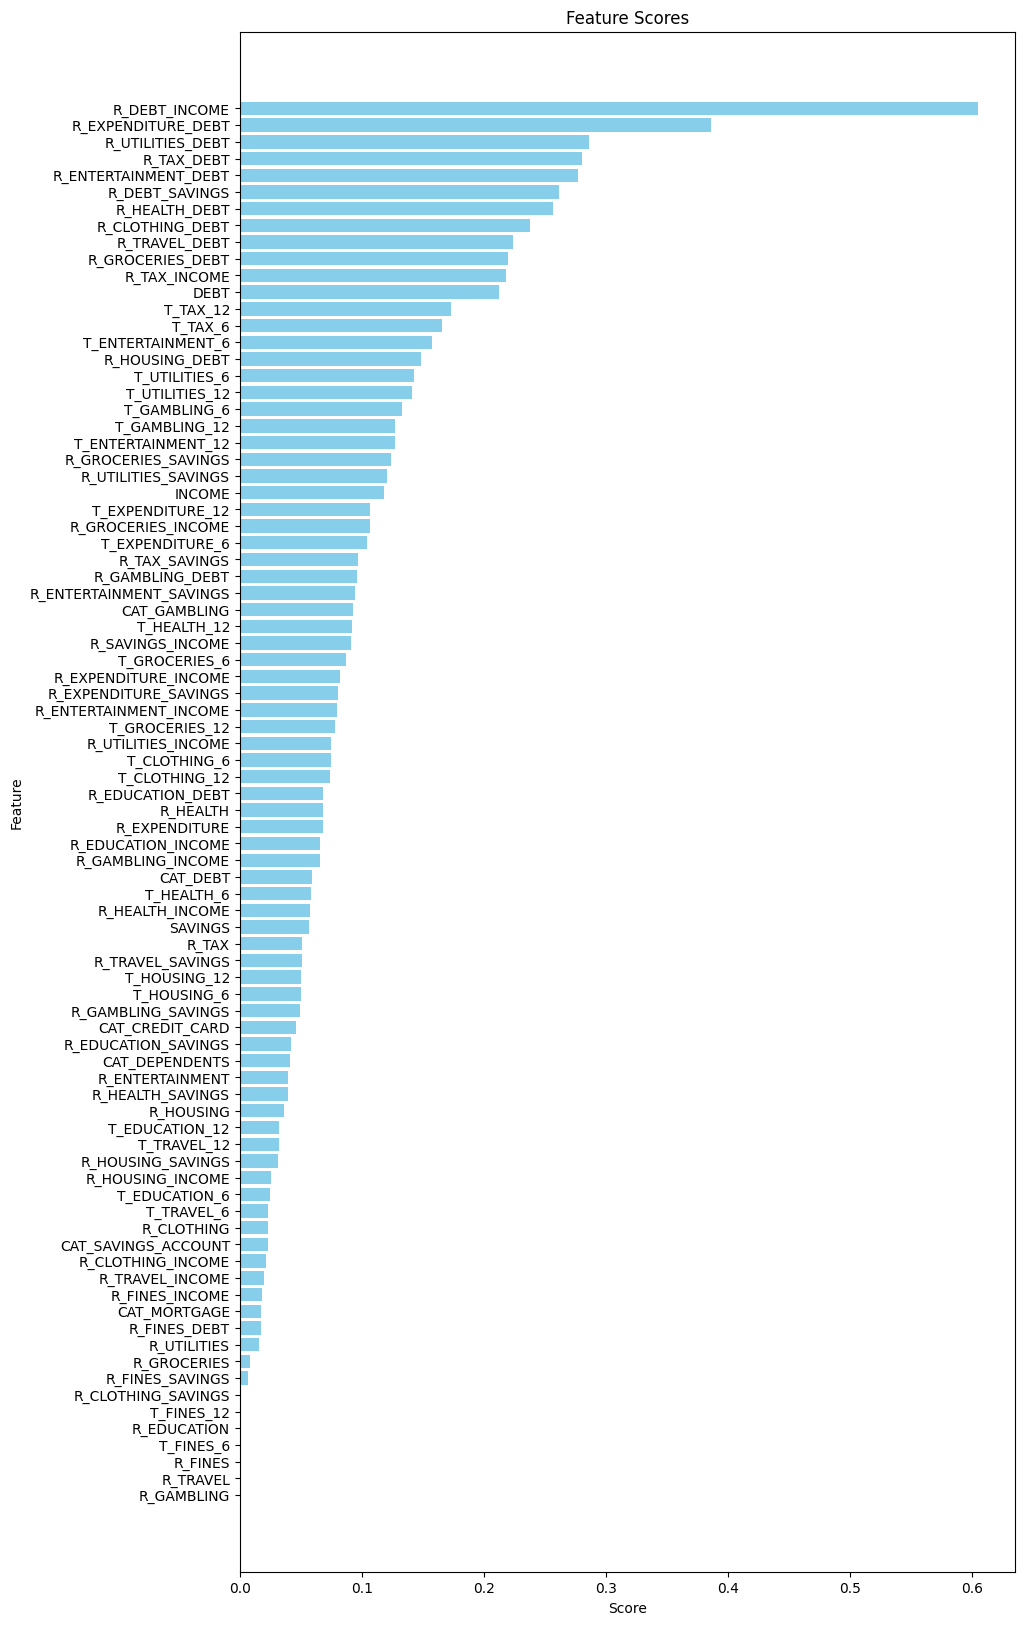

In [25]:
plt.figure(figsize=(10, 20))
plt.barh(sorted_scores['Feature'], sorted_scores['Score'], color='skyblue')
plt.xlabel('Score')
plt.ylabel('Feature')
plt.title('Feature Scores')
plt.gca().invert_yaxis()  # Invert y-axis to show highest score on top
plt.show()

In [26]:
selected_features_mutual_info = sorted_scores[sorted_scores['Score']>0.1]["Feature"]
selected_features_mutual_info

4            R_DEBT_INCOME
77      R_EXPENDITURE_DEBT
71        R_UTILITIES_DEBT
59              R_TAX_DEBT
23    R_ENTERTAINMENT_DEBT
5           R_DEBT_SAVINGS
47           R_HEALTH_DEBT
11         R_CLOTHING_DEBT
65           R_TRAVEL_DEBT
41        R_GROCERIES_DEBT
57            R_TAX_INCOME
2                     DEBT
54                T_TAX_12
55                 T_TAX_6
19       T_ENTERTAINMENT_6
53          R_HOUSING_DEBT
67           T_UTILITIES_6
66          T_UTILITIES_12
31            T_GAMBLING_6
30           T_GAMBLING_12
18      T_ENTERTAINMENT_12
40     R_GROCERIES_SAVINGS
70     R_UTILITIES_SAVINGS
0                   INCOME
72        T_EXPENDITURE_12
39      R_GROCERIES_INCOME
73         T_EXPENDITURE_6
Name: Feature, dtype: object

## Lasso Regression

In [27]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X.shape, y.shape

((1000, 84), (1000,))

In [28]:
len(X.columns)

84

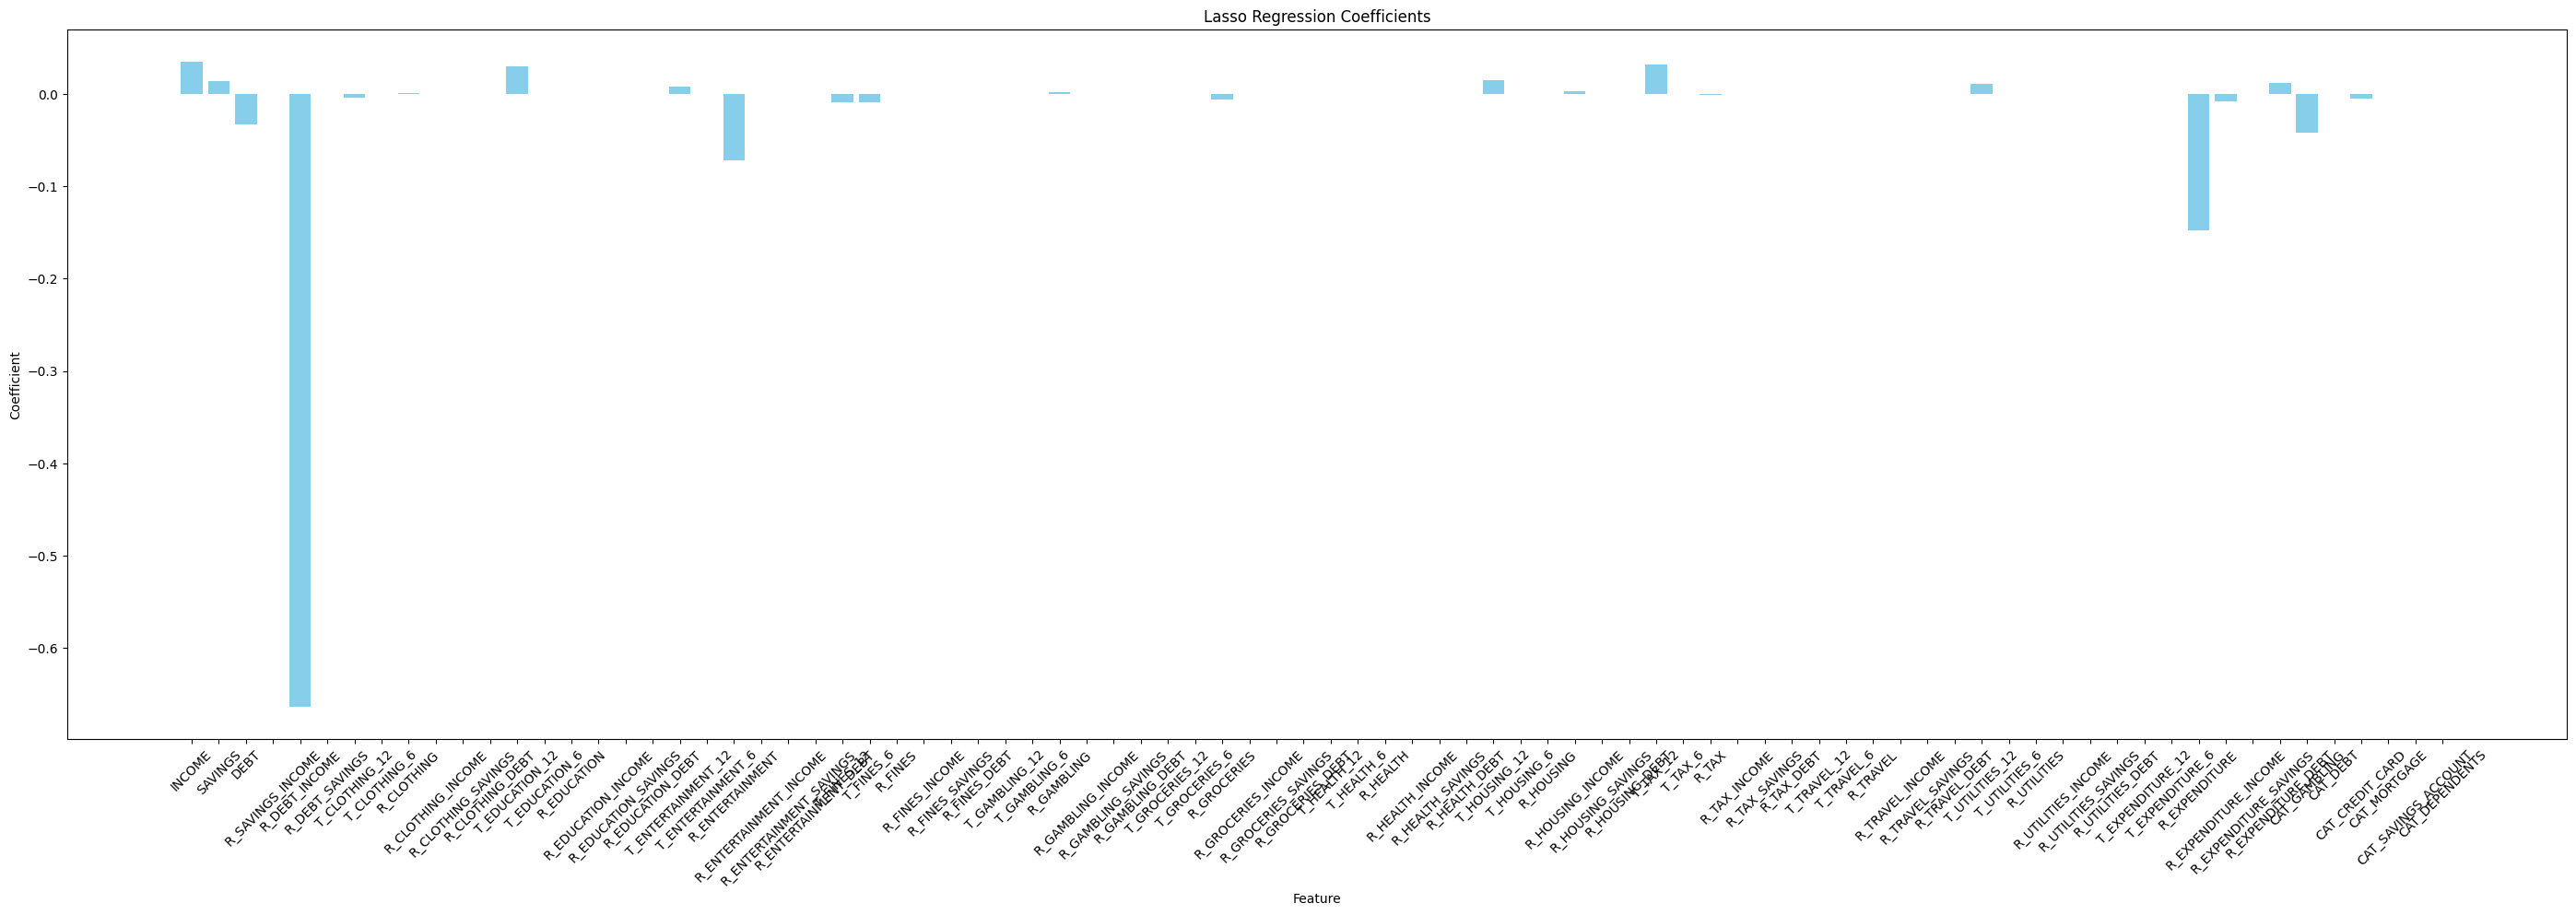

Selected Features:
Index(['INCOME', 'SAVINGS', 'DEBT', 'R_DEBT_INCOME', 'T_CLOTHING_12',
       'R_CLOTHING', 'T_EDUCATION_12', 'T_ENTERTAINMENT_12', 'R_ENTERTAINMENT',
       'T_FINES_12', 'T_FINES_6', 'R_GAMBLING', 'R_GROCERIES', 'T_HOUSING_12',
       'R_HOUSING_INCOME', 'T_TAX_12', 'R_TAX', 'T_UTILITIES_12',
       'R_EXPENDITURE', 'R_EXPENDITURE_INCOME', 'R_EXPENDITURE_DEBT',
       'CAT_GAMBLING', 'CAT_CREDIT_CARD'],
      dtype='object')


In [29]:
from sklearn.linear_model import LassoCV

# Fit LassoCV model
lasso_cv = LassoCV(cv=5)  # Use cross-validation to find the best regularization parameter
lasso_cv.fit(X, y)

# Extract selected features
selected_features_lasso = X.columns[lasso_cv.coef_ != 0]

# Plot feature coefficients
plt.figure(figsize=(35, 10))
plt.bar(X.columns, lasso_cv.coef_, color='skyblue')
plt.xlabel('Feature')
plt.ylabel('Coefficient')
plt.title('Lasso Regression Coefficients')
plt.xticks(rotation=45)
plt.show()

# Print selected features
print("Selected Features:")
print(selected_features_lasso)

In [30]:
len(selected_features_lasso)

23

## RandomForestRegressor

In [31]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Assuming X_train and y_train are your training features and target
# Initialize Random Forest Regressor
rf_model = RandomForestRegressor()

# Fit the model
rf_model.fit(X_train, y_train)

# Get feature importances
importances = rf_model.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))


Feature ranking:
1. feature 4 (0.717938)
2. feature 74 (0.044284)
3. feature 77 (0.014104)
4. feature 33 (0.010295)
5. feature 59 (0.010111)
6. feature 20 (0.008119)
7. feature 71 (0.007581)
8. feature 0 (0.007462)
9. feature 62 (0.007115)
10. feature 54 (0.006144)
11. feature 2 (0.006003)
12. feature 38 (0.005902)
13. feature 73 (0.005816)
14. feature 5 (0.005504)
15. feature 9 (0.004452)
16. feature 8 (0.004211)
17. feature 32 (0.004160)
18. feature 44 (0.004106)
19. feature 55 (0.004043)
20. feature 67 (0.003898)
21. feature 30 (0.003760)
22. feature 7 (0.003699)
23. feature 42 (0.003694)
24. feature 68 (0.003601)
25. feature 61 (0.003572)
26. feature 14 (0.003533)
27. feature 72 (0.003389)
28. feature 60 (0.003347)
29. feature 39 (0.003336)
30. feature 1 (0.003285)
31. feature 47 (0.003247)
32. feature 45 (0.003205)
33. feature 26 (0.003017)
34. feature 66 (0.002882)
35. feature 41 (0.002817)
36. feature 23 (0.002646)
37. feature 11 (0.002589)
38. feature 6 (0.002564)
39. feature 4

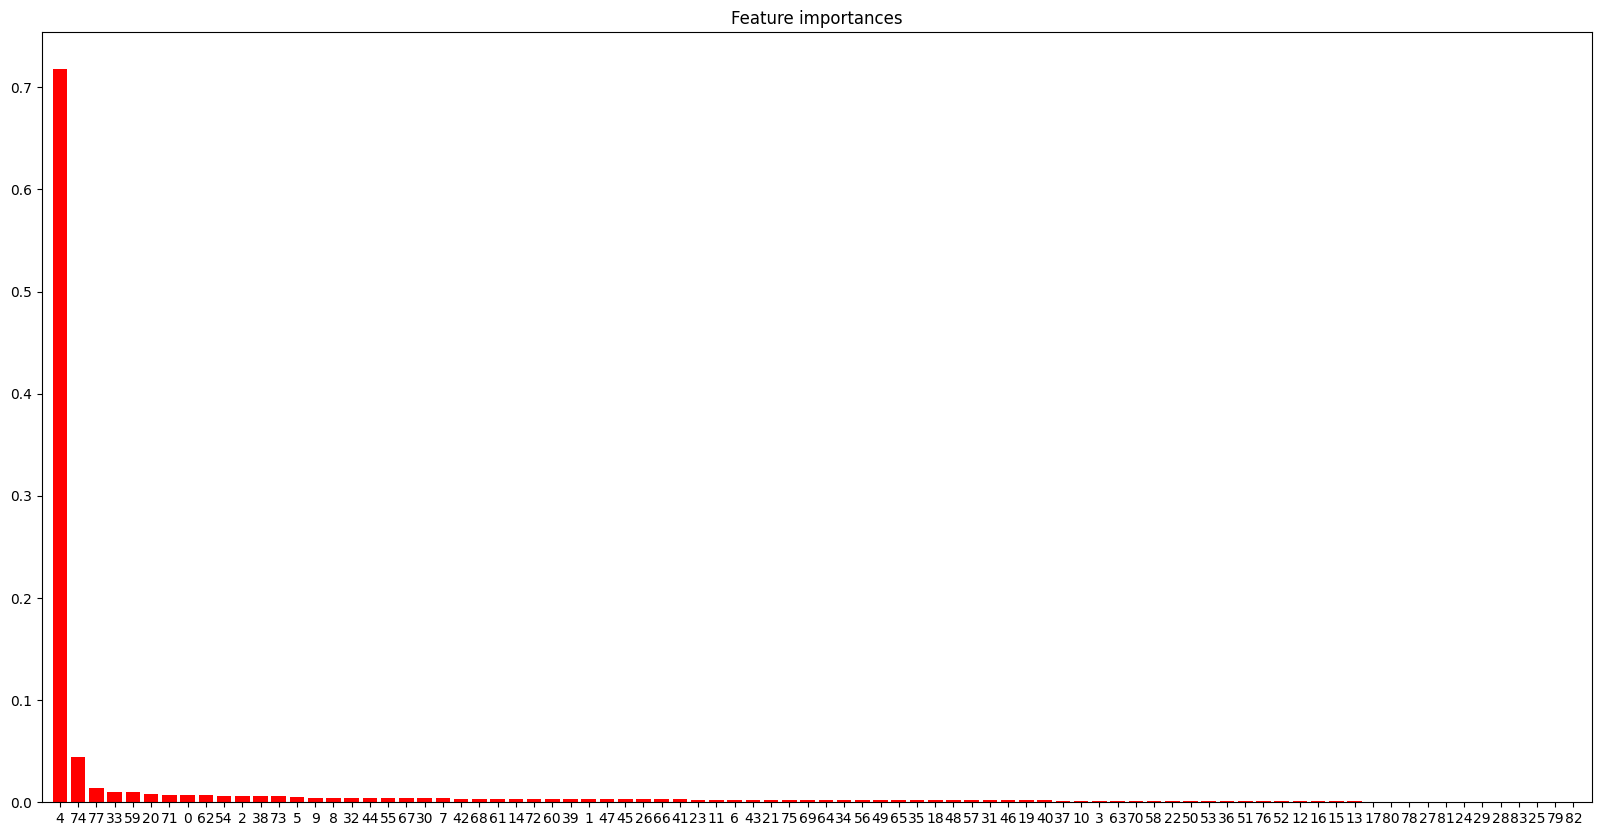

In [32]:
# Plot the feature importances
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [33]:
# printing in order of importance 
X.columns[indices-1]

Index(['R_SAVINGS_INCOME', 'T_EXPENDITURE_6', 'R_EXPENDITURE_SAVINGS',
       'R_GAMBLING', 'R_TAX_SAVINGS', 'T_ENTERTAINMENT_6',
       'R_UTILITIES_SAVINGS', 'CAT_DEPENDENTS', 'T_TRAVEL_6', 'R_HOUSING_DEBT',
       'SAVINGS', 'T_GROCERIES_6', 'T_EXPENDITURE_12', 'R_DEBT_INCOME',
       'R_CLOTHING', 'T_CLOTHING_6', 'T_GAMBLING_6', 'T_HEALTH_6', 'T_TAX_12',
       'T_UTILITIES_12', 'R_FINES_DEBT', 'T_CLOTHING_12', 'R_GROCERIES_DEBT',
       'T_UTILITIES_6', 'T_TRAVEL_12', 'T_EDUCATION_6', 'R_UTILITIES_DEBT',
       'R_TAX_DEBT', 'R_GROCERIES', 'INCOME', 'R_HEALTH_SAVINGS', 'R_HEALTH',
       'T_FINES_6', 'R_TRAVEL_DEBT', 'R_GROCERIES_SAVINGS',
       'R_ENTERTAINMENT_SAVINGS', 'R_CLOTHING_SAVINGS', 'R_DEBT_SAVINGS',
       'T_HEALTH_12', 'R_ENTERTAINMENT', 'R_EXPENDITURE', 'R_UTILITIES',
       'R_TRAVEL_INCOME', 'R_GAMBLING_INCOME', 'T_TAX_6', 'T_HOUSING_12',
       'R_TRAVEL_SAVINGS', 'R_GAMBLING_SAVINGS', 'R_EDUCATION_DEBT',
       'R_HEALTH_DEBT', 'R_TAX', 'T_GAMBLING_12', 'R_HEAL

In [34]:
# indices of important columns
indexes = []
i = 0
while indices[i]!=15:
    i += 1
    indexes.append(indices[i])
print(indexes)  

[74, 77, 33, 59, 20, 71, 0, 62, 54, 2, 38, 73, 5, 9, 8, 32, 44, 55, 67, 30, 7, 42, 68, 61, 14, 72, 60, 39, 1, 47, 45, 26, 66, 41, 23, 11, 6, 43, 21, 75, 69, 64, 34, 56, 49, 65, 35, 18, 48, 57, 31, 46, 19, 40, 37, 10, 3, 63, 70, 58, 22, 50, 53, 36, 51, 76, 52, 12, 16, 15]


In [35]:
len(indexes)

70

In [36]:
rfr_columns = X.columns[indexes]
rfr_columns

Index(['R_EXPENDITURE', 'R_EXPENDITURE_DEBT', 'R_GAMBLING_INCOME',
       'R_TAX_DEBT', 'R_ENTERTAINMENT', 'R_UTILITIES_DEBT', 'INCOME',
       'R_TRAVEL', 'T_TAX_12', 'DEBT', 'R_GROCERIES', 'T_EXPENDITURE_6',
       'R_DEBT_SAVINGS', 'R_CLOTHING_INCOME', 'R_CLOTHING', 'R_GAMBLING',
       'R_HEALTH', 'T_TAX_6', 'T_UTILITIES_6', 'T_GAMBLING_12', 'T_CLOTHING_6',
       'T_HEALTH_12', 'R_UTILITIES', 'T_TRAVEL_6', 'R_EDUCATION',
       'T_EXPENDITURE_12', 'T_TRAVEL_12', 'R_GROCERIES_INCOME', 'SAVINGS',
       'R_HEALTH_DEBT', 'R_HEALTH_INCOME', 'R_FINES', 'T_UTILITIES_12',
       'R_GROCERIES_DEBT', 'R_ENTERTAINMENT_DEBT', 'R_CLOTHING_DEBT',
       'T_CLOTHING_12', 'T_HEALTH_6', 'R_ENTERTAINMENT_INCOME',
       'R_EXPENDITURE_INCOME', 'R_UTILITIES_INCOME', 'R_TRAVEL_SAVINGS',
       'R_GAMBLING_SAVINGS', 'R_TAX', 'T_HOUSING_6', 'R_TRAVEL_DEBT',
       'R_GAMBLING_DEBT', 'T_ENTERTAINMENT_12', 'T_HOUSING_12', 'R_TAX_INCOME',
       'T_GAMBLING_6', 'R_HEALTH_SAVINGS', 'T_ENTERTAINMENT_6',
  

## GradientBoostingRegressor

In [37]:
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np

# Assuming X_train and y_train are your training features and target
# Initialize Gradient Boosting Regressor
gb_model = GradientBoostingRegressor()

# Fit the model
gb_model.fit(X_train, y_train)

# Get feature importances
importances = gb_model.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))



Feature ranking:
1. feature 4 (0.745129)
2. feature 74 (0.049140)
3. feature 59 (0.019000)
4. feature 77 (0.017291)
5. feature 33 (0.015310)
6. feature 20 (0.011781)
7. feature 2 (0.011315)
8. feature 0 (0.009113)
9. feature 54 (0.006231)
10. feature 57 (0.005797)
11. feature 30 (0.005687)
12. feature 67 (0.005028)
13. feature 41 (0.004907)
14. feature 62 (0.004541)
15. feature 1 (0.004111)
16. feature 9 (0.004097)
17. feature 6 (0.004069)
18. feature 75 (0.003992)
19. feature 66 (0.003900)
20. feature 72 (0.003773)
21. feature 60 (0.003674)
22. feature 5 (0.003635)
23. feature 31 (0.003210)
24. feature 38 (0.003084)
25. feature 73 (0.003084)
26. feature 42 (0.003066)
27. feature 65 (0.002754)
28. feature 7 (0.002687)
29. feature 49 (0.002563)
30. feature 39 (0.002061)
31. feature 71 (0.002050)
32. feature 43 (0.002009)
33. feature 47 (0.001936)
34. feature 19 (0.001803)
35. feature 37 (0.001765)
36. feature 45 (0.001644)
37. feature 78 (0.001553)
38. feature 48 (0.001541)
39. feature 

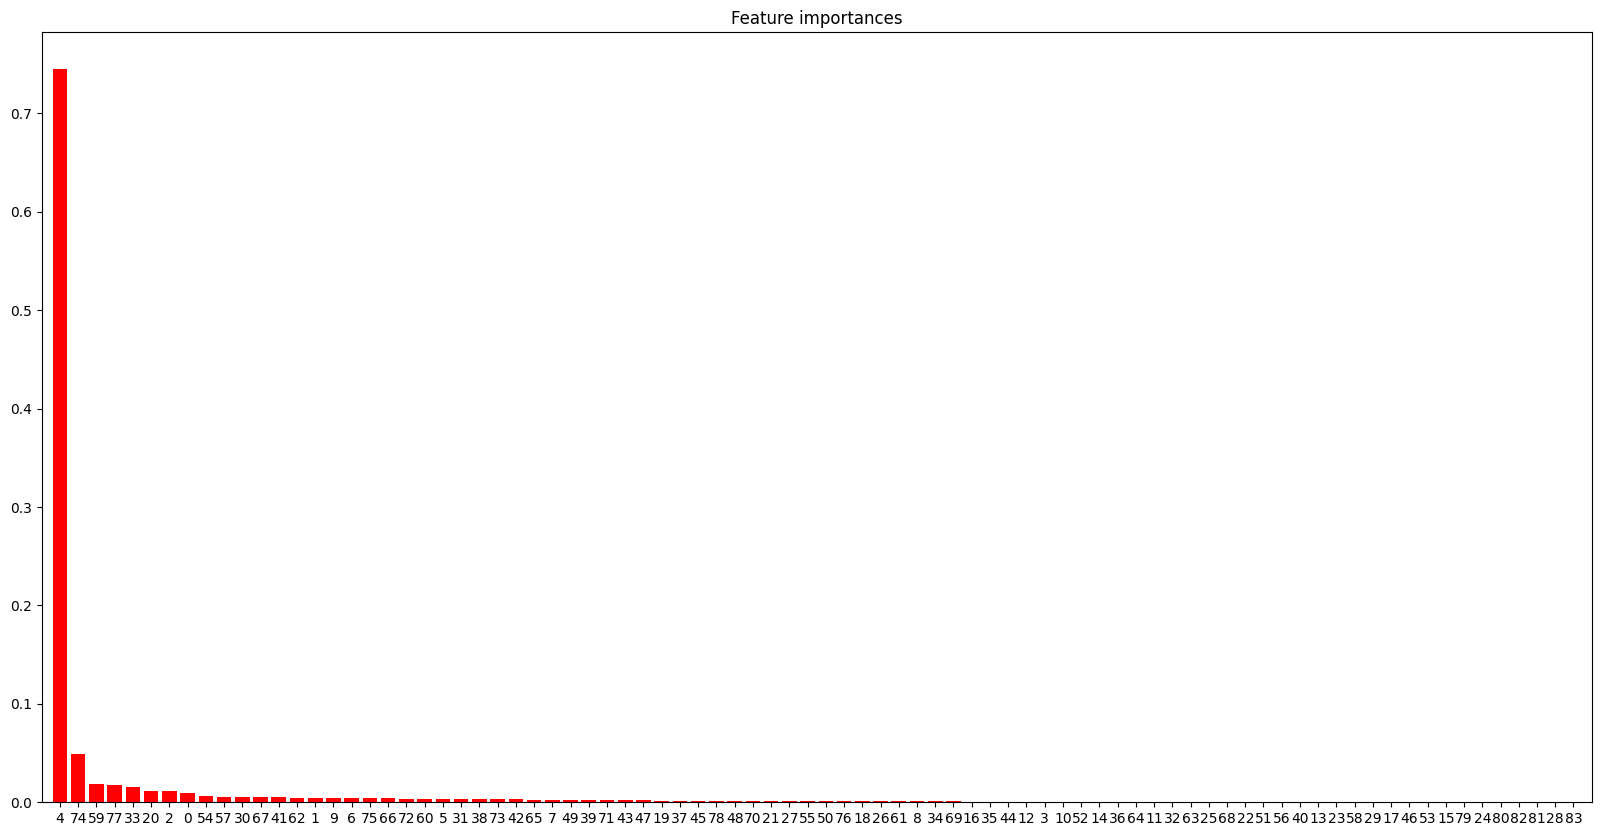

In [38]:
# Plot the feature importances
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [39]:
# printing in order of importance
X.columns[indices-1]

Index(['R_SAVINGS_INCOME', 'T_EXPENDITURE_6', 'R_TAX_SAVINGS',
       'R_EXPENDITURE_SAVINGS', 'R_GAMBLING', 'T_ENTERTAINMENT_6', 'SAVINGS',
       'CAT_DEPENDENTS', 'R_HOUSING_DEBT', 'R_TAX', 'R_FINES_DEBT',
       'T_UTILITIES_12', 'R_GROCERIES_SAVINGS', 'T_TRAVEL_6', 'INCOME',
       'R_CLOTHING', 'R_DEBT_SAVINGS', 'R_EXPENDITURE', 'R_TRAVEL_DEBT',
       'R_UTILITIES_DEBT', 'R_TAX_DEBT', 'R_DEBT_INCOME', 'T_GAMBLING_12',
       'T_GROCERIES_6', 'T_EXPENDITURE_12', 'R_GROCERIES_DEBT',
       'R_TRAVEL_SAVINGS', 'T_CLOTHING_12', 'T_HOUSING_12', 'R_GROCERIES',
       'R_UTILITIES_SAVINGS', 'T_HEALTH_12', 'R_HEALTH_SAVINGS',
       'T_ENTERTAINMENT_12', 'T_GROCERIES_12', 'R_HEALTH',
       'R_EXPENDITURE_DEBT', 'R_HEALTH_DEBT', 'R_UTILITIES_INCOME',
       'R_ENTERTAINMENT', 'R_FINES', 'T_TAX_12', 'T_HOUSING_6',
       'R_EXPENDITURE_INCOME', 'R_EDUCATION_DEBT', 'T_FINES_6', 'T_TRAVEL_12',
       'T_CLOTHING_6', 'R_GAMBLING_INCOME', 'R_UTILITIES',
       'R_EDUCATION_INCOME', 'R_GAMBLI

In [40]:
# indices of important columns
indexes = []
i = 0
while indices[i]!=69:
    i += 1
    indexes.append(indices[i])
print(indexes)    

[74, 59, 77, 33, 20, 2, 0, 54, 57, 30, 67, 41, 62, 1, 9, 6, 75, 66, 72, 60, 5, 31, 38, 73, 42, 65, 7, 49, 39, 71, 43, 47, 19, 37, 45, 78, 48, 70, 21, 27, 55, 50, 76, 18, 26, 61, 8, 34, 69]


In [41]:
gbr_columns = X.columns[indexes]
gbr_columns

Index(['R_EXPENDITURE', 'R_TAX_DEBT', 'R_EXPENDITURE_DEBT',
       'R_GAMBLING_INCOME', 'R_ENTERTAINMENT', 'DEBT', 'INCOME', 'T_TAX_12',
       'R_TAX_INCOME', 'T_GAMBLING_12', 'T_UTILITIES_6', 'R_GROCERIES_DEBT',
       'R_TRAVEL', 'SAVINGS', 'R_CLOTHING_INCOME', 'T_CLOTHING_12',
       'R_EXPENDITURE_INCOME', 'T_UTILITIES_12', 'T_EXPENDITURE_12',
       'T_TRAVEL_12', 'R_DEBT_SAVINGS', 'T_GAMBLING_6', 'R_GROCERIES',
       'T_EXPENDITURE_6', 'T_HEALTH_12', 'R_TRAVEL_DEBT', 'T_CLOTHING_6',
       'T_HOUSING_6', 'R_GROCERIES_INCOME', 'R_UTILITIES_DEBT', 'T_HEALTH_6',
       'R_HEALTH_DEBT', 'T_ENTERTAINMENT_6', 'T_GROCERIES_6',
       'R_HEALTH_INCOME', 'CAT_GAMBLING', 'T_HOUSING_12',
       'R_UTILITIES_SAVINGS', 'R_ENTERTAINMENT_INCOME', 'R_FINES_INCOME',
       'T_TAX_6', 'R_HOUSING', 'R_EXPENDITURE_SAVINGS', 'T_ENTERTAINMENT_12',
       'R_FINES', 'T_TRAVEL_6', 'R_CLOTHING', 'R_GAMBLING_SAVINGS',
       'R_UTILITIES_INCOME'],
      dtype='object')

## Intersections

In [42]:
'''
1) gbr_columns
2) rfr_columns
3)selected_features_f_reg 
4)selected_features_lasso
5)selected_features_mutual_info
'''
gbr_columns

Index(['R_EXPENDITURE', 'R_TAX_DEBT', 'R_EXPENDITURE_DEBT',
       'R_GAMBLING_INCOME', 'R_ENTERTAINMENT', 'DEBT', 'INCOME', 'T_TAX_12',
       'R_TAX_INCOME', 'T_GAMBLING_12', 'T_UTILITIES_6', 'R_GROCERIES_DEBT',
       'R_TRAVEL', 'SAVINGS', 'R_CLOTHING_INCOME', 'T_CLOTHING_12',
       'R_EXPENDITURE_INCOME', 'T_UTILITIES_12', 'T_EXPENDITURE_12',
       'T_TRAVEL_12', 'R_DEBT_SAVINGS', 'T_GAMBLING_6', 'R_GROCERIES',
       'T_EXPENDITURE_6', 'T_HEALTH_12', 'R_TRAVEL_DEBT', 'T_CLOTHING_6',
       'T_HOUSING_6', 'R_GROCERIES_INCOME', 'R_UTILITIES_DEBT', 'T_HEALTH_6',
       'R_HEALTH_DEBT', 'T_ENTERTAINMENT_6', 'T_GROCERIES_6',
       'R_HEALTH_INCOME', 'CAT_GAMBLING', 'T_HOUSING_12',
       'R_UTILITIES_SAVINGS', 'R_ENTERTAINMENT_INCOME', 'R_FINES_INCOME',
       'T_TAX_6', 'R_HOUSING', 'R_EXPENDITURE_SAVINGS', 'T_ENTERTAINMENT_12',
       'R_FINES', 'T_TRAVEL_6', 'R_CLOTHING', 'R_GAMBLING_SAVINGS',
       'R_UTILITIES_INCOME'],
      dtype='object')

In [43]:
rfr_columns

Index(['R_EXPENDITURE', 'R_EXPENDITURE_DEBT', 'R_GAMBLING_INCOME',
       'R_TAX_DEBT', 'R_ENTERTAINMENT', 'R_UTILITIES_DEBT', 'INCOME',
       'R_TRAVEL', 'T_TAX_12', 'DEBT', 'R_GROCERIES', 'T_EXPENDITURE_6',
       'R_DEBT_SAVINGS', 'R_CLOTHING_INCOME', 'R_CLOTHING', 'R_GAMBLING',
       'R_HEALTH', 'T_TAX_6', 'T_UTILITIES_6', 'T_GAMBLING_12', 'T_CLOTHING_6',
       'T_HEALTH_12', 'R_UTILITIES', 'T_TRAVEL_6', 'R_EDUCATION',
       'T_EXPENDITURE_12', 'T_TRAVEL_12', 'R_GROCERIES_INCOME', 'SAVINGS',
       'R_HEALTH_DEBT', 'R_HEALTH_INCOME', 'R_FINES', 'T_UTILITIES_12',
       'R_GROCERIES_DEBT', 'R_ENTERTAINMENT_DEBT', 'R_CLOTHING_DEBT',
       'T_CLOTHING_12', 'T_HEALTH_6', 'R_ENTERTAINMENT_INCOME',
       'R_EXPENDITURE_INCOME', 'R_UTILITIES_INCOME', 'R_TRAVEL_SAVINGS',
       'R_GAMBLING_SAVINGS', 'R_TAX', 'T_HOUSING_6', 'R_TRAVEL_DEBT',
       'R_GAMBLING_DEBT', 'T_ENTERTAINMENT_12', 'T_HOUSING_12', 'R_TAX_INCOME',
       'T_GAMBLING_6', 'R_HEALTH_SAVINGS', 'T_ENTERTAINMENT_6',
  

In [44]:
f_reg_columns = selected_features_f_reg.T.columns
f_reg_columns

Index(['R_DEBT_INCOME', 'R_DEBT_SAVINGS', 'R_EDUCATION_INCOME', 'DEBT',
       'R_UTILITIES_DEBT', 'R_GROCERIES_DEBT', 'R_EXPENDITURE_DEBT',
       'R_TAX_DEBT', 'R_ENTERTAINMENT_DEBT', 'R_HEALTH_DEBT',
       'R_HEALTH_SAVINGS', 'CAT_GAMBLING', 'R_UTILITIES_SAVINGS',
       'R_CLOTHING_DEBT', 'R_SAVINGS_INCOME', 'R_TRAVEL_DEBT',
       'R_EDUCATION_SAVINGS', 'CAT_CREDIT_CARD', 'R_HOUSING_DEBT',
       'R_GROCERIES_SAVINGS', 'CAT_DEBT', 'R_GAMBLING_INCOME',
       'R_ENTERTAINMENT_INCOME', 'R_EXPENDITURE', 'R_GROCERIES_INCOME',
       'CAT_DEPENDENTS', 'R_GAMBLING_SAVINGS', 'R_HEALTH_INCOME',
       'R_HOUSING_SAVINGS', 'R_TRAVEL', 'R_GROCERIES', 'CAT_SAVINGS_ACCOUNT',
       'R_ENTERTAINMENT', 'R_CLOTHING_SAVINGS', 'T_EDUCATION_12',
       'T_EDUCATION_6', 'T_ENTERTAINMENT_12', 'R_EDUCATION_DEBT',
       'T_GAMBLING_12', 'T_GAMBLING_6', 'R_HEALTH', 'R_TAX',
       'T_ENTERTAINMENT_6', 'R_GAMBLING_DEBT', 'R_ENTERTAINMENT_SAVINGS'],
      dtype='object', name='Feature')

In [45]:
selected_features_lasso

Index(['INCOME', 'SAVINGS', 'DEBT', 'R_DEBT_INCOME', 'T_CLOTHING_12',
       'R_CLOTHING', 'T_EDUCATION_12', 'T_ENTERTAINMENT_12', 'R_ENTERTAINMENT',
       'T_FINES_12', 'T_FINES_6', 'R_GAMBLING', 'R_GROCERIES', 'T_HOUSING_12',
       'R_HOUSING_INCOME', 'T_TAX_12', 'R_TAX', 'T_UTILITIES_12',
       'R_EXPENDITURE', 'R_EXPENDITURE_INCOME', 'R_EXPENDITURE_DEBT',
       'CAT_GAMBLING', 'CAT_CREDIT_CARD'],
      dtype='object')

In [46]:
mutual_info_columns = selected_features_mutual_info.values
mutual_info_columns

array(['R_DEBT_INCOME', 'R_EXPENDITURE_DEBT', 'R_UTILITIES_DEBT',
       'R_TAX_DEBT', 'R_ENTERTAINMENT_DEBT', 'R_DEBT_SAVINGS',
       'R_HEALTH_DEBT', 'R_CLOTHING_DEBT', 'R_TRAVEL_DEBT',
       'R_GROCERIES_DEBT', 'R_TAX_INCOME', 'DEBT', 'T_TAX_12', 'T_TAX_6',
       'T_ENTERTAINMENT_6', 'R_HOUSING_DEBT', 'T_UTILITIES_6',
       'T_UTILITIES_12', 'T_GAMBLING_6', 'T_GAMBLING_12',
       'T_ENTERTAINMENT_12', 'R_GROCERIES_SAVINGS', 'R_UTILITIES_SAVINGS',
       'INCOME', 'T_EXPENDITURE_12', 'R_GROCERIES_INCOME',
       'T_EXPENDITURE_6'], dtype=object)

In [48]:
intersection = np.intersect1d(gbr_columns, rfr_columns)
intersection = np.intersect1d(intersection, f_reg_columns)
intersection = np.intersect1d(intersection, selected_features_lasso)
intersection = np.intersect1d(intersection, mutual_info_columns)

print("Intersection of arrays:", intersection)

Intersection of arrays: ['DEBT' 'R_EXPENDITURE_DEBT' 'T_ENTERTAINMENT_12']
